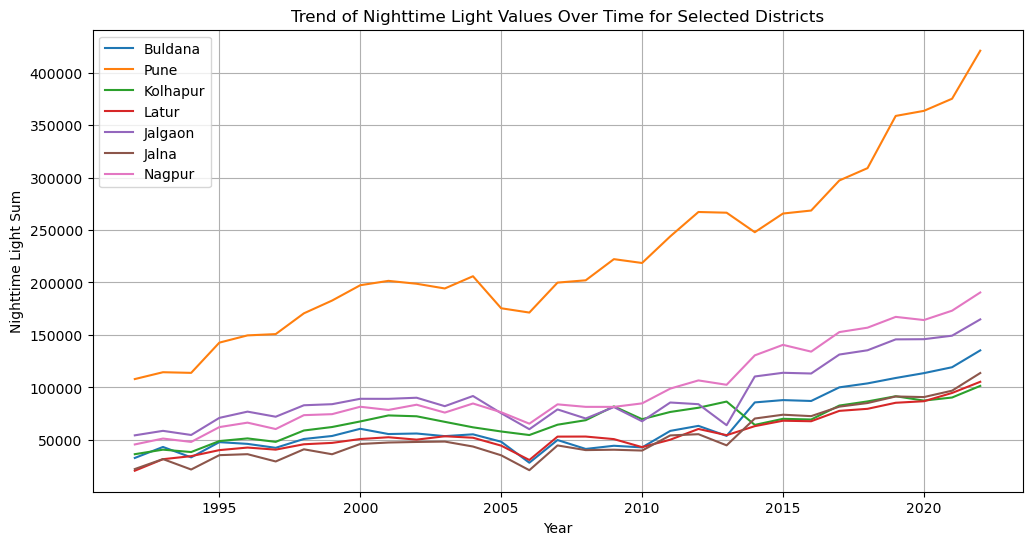

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('Final Harmonised NTL data (1992-2022).csv')

# Select districts to plot
selected_districts = ['Buldana', 'Pune', 'Kolhapur', 'Latur', 'Jalgaon', 'Jalna', 'Nagpur']

# Filter data for selected districts
filtered_data = data[data['Name of District'].isin(selected_districts)]

# Melt the data to have 'Year' and 'Light_Value' columns
melted_data = filtered_data.melt(id_vars=['Name of District'], var_name='Year', value_name='Light_Value')
melted_data = melted_data[melted_data['Year'].str.isdigit()]  # Filter out any non-year columns
melted_data['Year'] = melted_data['Year'].astype(int)  # Convert Year to int for plotting

# Plotting
plt.figure(figsize=(12, 6))
for district in selected_districts:
    subset = melted_data[melted_data['Name of District'] == district]
    plt.plot(subset['Year'], subset['Light_Value'], label=district)

plt.xlabel('Year')
plt.ylabel('Nighttime Light Sum')
plt.title('Trend of Nighttime Light Values Over Time for Selected Districts')
plt.legend()
plt.grid(True)
plt.show()

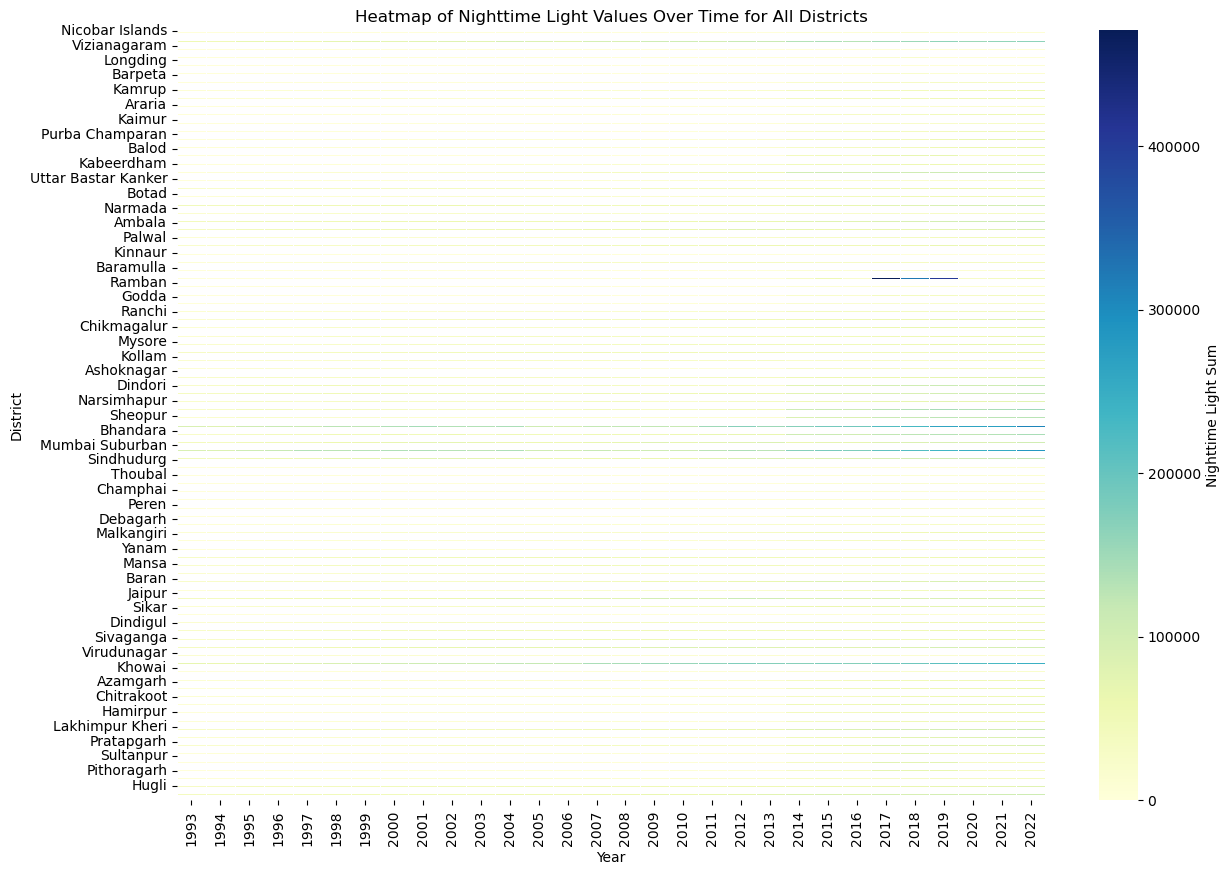

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data in a suitable format
heatmap_data = data.set_index('Name of District').iloc[:, 2:]  # Exclude identifier columns
heatmap_data.columns = heatmap_data.columns.astype(int)  # Set columns (years) as integers

# Plotting heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu', cbar_kws={'label': 'Nighttime Light Sum'}, linewidths=0.5)
plt.xlabel('Year')
plt.ylabel('District')
plt.title('Heatmap of Nighttime Light Values Over Time for All Districts')
plt.show()